## Modeling

In [195]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import statsmodels.api as sm

plt.style.use('fivethirtyeight')

In [13]:
teams_master = pd.read_csv('../Data/Teams/teams_master.csv')

In [14]:
pd.set_option('display.max_columns', None)

In [164]:
teams_master['CHAMPS'].value_counts()

0    977
1     36
Name: CHAMPS, dtype: int64

In [15]:
teams_master.head()

,Unnamed: 0,TEAM_ID,TEAM_CITY,TEAM_NAME,YEAR,GP,WINS,LOSSES,WIN_PCT,CONF_RANK,DIV_RANK,PO_WINS,PO_LOSSES,CONF_COUNT,DIV_COUNT,NBA_FINALS_APPEARANCE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,PF,STL,TOV,BLK,PTS,PTS_RANK,FG2M,FG2A,FG2_PCT,FG3A/FGA,FG2A/FGA,FTA/FGA,FG3A/FG2A,FG2M_PER_GP,FG3M_PER_GP,FG2A_PER_GP,FG3A_PER_GP,PTS_PER_GP,3PT_PER_PTS,2PT_PER_PTS,PLAYOFFS,CHAMPS,FINALS_LOSS,FINALS_APPEARANCE
0,34,1610612755,Philadelphia,76ers,1983-01-01,82,52,30,0.634,3,2,2,3,11.0,5,NaN,3384,6833,0.495,29,107,0.271,2041,2706,0.754,1181,2382,3563,2032,2040,807,1628,653,8838,16,3355,6726,0.498811,0.015659,0.984341,0.396019,0.015908,40.914634,0.353659,82.024390,1.304878,107.780488,0.009844,0.759222,1,0,0,0
1,35,1610612755,Philadelphia,76ers,1984-01-01,82,58,24,0.707,3,2,8,5,11.0,5,NaN,3443,6992,0.492,59,224,0.263,2316,2883,0.803,1301,2364,3665,1999,1971,817,1575,534,9261,8,3384,6768,0.500000,0.032037,0.967963,0.412328,0.033097,41.268293,0.719512,82.536585,2.731707,112.939024,0.019112,0.730807,1,0,0,0
2,36,1610612755,Philadelphia,76ers,1985-01-01,82,54,28,0.659,3,2,6,6,11.0,5,NaN,3435,7058,0.487,51,224,0.228,2130,2810,0.758,1326,2378,3704,2017,1798,862,1595,490,9051,11,3384,6834,0.495171,0.031737,0.968263,0.398130,0.032777,41.268293,0.621951,83.341463,2.731707,110.378049,0.016904,0.747763,1,0,0,0
3,37,1610612755,Philadelphia,76ers,1986-01-01,82,45,37,0.549,5,2,2,3,11.0,5,NaN,3335,6792,0.491,88,340,0.259,1971,2617,0.753,1178,2327,3505,1943,1774,768,1519,540,8729,17,3247,6452,0.503255,0.050059,0.949941,0.385306,0.052697,39.597561,1.073171,78.682927,4.146341,106.451220,0.030244,0.743957,1,0,0,0
4,38,1610612755,Philadelphia,76ers,1987-01-01,82,36,46,0.439,10,4,0,0,11.0,5,NaN,3214,6785,0.474,152,471,0.323,2087,2731,0.764,1219,2307,3526,1897,1866,672,1433,465,8667,16,3062,6314,0.484954,0.069418,0.930582,0.402506,0.074596,37.341463,1.853659,77.000000,5.743902,105.695122,0.052613,0.706588,0,0,0,0


In [79]:
teams_master['FTM_PER_GP']=teams_master['FTM']/teams_master['GP']
teams_master['FTA_PER_GP']=teams_master['FTA']/teams_master['GP']
teams_master['OREB_PER_GP']=teams_master['OREB']/teams_master['GP']
teams_master['DREB_PER_GP']=teams_master['DREB']/teams_master['GP']
teams_master['REB_PER_GP']=teams_master['REB']/teams_master['GP']
teams_master['AST_PER_GP']=teams_master['AST']/teams_master['GP']
teams_master['PF_PER_GP']=teams_master['PF']/teams_master['GP']
teams_master['STL_PER_GP']=teams_master['STL']/teams_master['GP']
teams_master['TOV_PER_GP']=teams_master['TOV']/teams_master['GP']
teams_master['BLK_PER_GP']=teams_master['BLK']/teams_master['GP']

In [16]:
# Create column with normalized wins in 82 game season to account for two lockout seasons

teams_master['Wins'] = teams_master['WINS']/teams_master['GP']*82
teams_master['FGA_PER_GP'] = teams_master['FGA']/teams_master['GP']

In [17]:
heatmap=teams_master[['Wins','FG_PCT','FG2_PCT','FG3_PCT','FT_PCT','FGA_PER_GP','FG2A_PER_GP','FG3A_PER_GP','PTS_PER_GP','FG3A/FG2A']]

In [18]:
corrs = heatmap.corr()[['Wins']].sort_values(by='Wins',ascending=False)
corrs

,Wins
Wins,1.000000
FG2_PCT,0.521586
FG_PCT,0.488481
PTS_PER_GP,0.318351
FG3_PCT,0.261430
FT_PCT,0.180578
FG3A/FG2A,0.111671
FG3A_PER_GP,0.091241
FGA_PER_GP,-0.083745
FG2A_PER_GP,-0.113714


In [48]:
features = ['FG2_PCT','FG3_PCT','FT_PCT','FG2A_PER_GP','FG3A_PER_GP','FG3A/FG2A']
X = teams_master[features]
y = teams_master['Wins']

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=69)

In [50]:
lr=LinearRegression()

In [51]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
lr.score(X_train,y_train)

0.40293932782699526

In [53]:
lr.score(X_test,y_test)

0.29463936349104336

In [59]:
ss=StandardScaler()
Z_train=ss.fit_transform(X_train)
Z_test=ss.transform(X_test)

In [61]:
lr.fit(Z_train,y_train)
lr.score(Z_train,y_train)

0.40293932782699526

In [64]:
lr.score(Z_test,y_test)

0.29463936349104414

In [66]:
r_alphas=np.logspace(0,5,100)
ridge_model=RidgeCV(alphas=r_alphas,scoring='r2',cv=5)
ridge_model=ridge_model.fit(Z_train,y_train)
print(f"Train R2 Score: {ridge_model.score(Z_train,y_train)}")
print(f" Test R2 Score: {ridge_model.score(Z_test,y_test)}")

Train R2 Score: 0.4028228993636327
 Test R2 Score: 0.2947414581828065


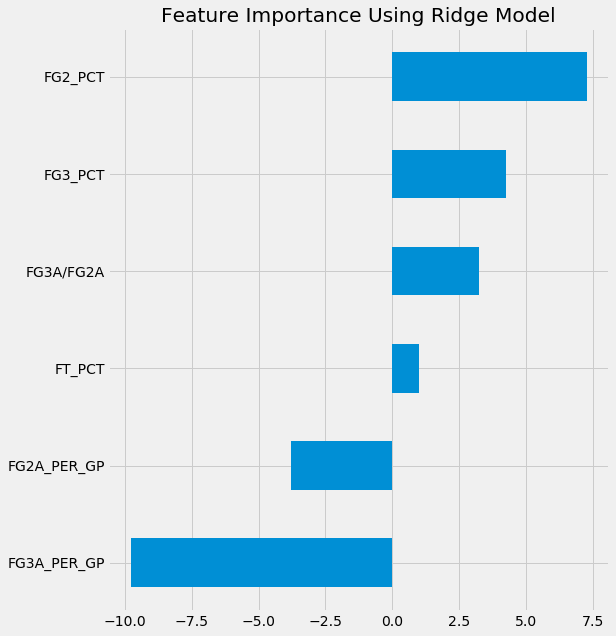

In [74]:
coef=pd.Series(ridge_model.coef_,index=X.columns)

imp_coef=coef.sort_values()

plt.plot(figsize=(10,8))
imp_coef.plot(kind = "barh")
plt.title("Feature Importance Using Ridge Model");

In [76]:
l_alphas=np.logspace(0,5,100)
lasso_model=LassoCV(alphas=l_alphas,cv=5,max_iter=5000)
lasso_model=ridge_model.fit(Z_train,y_train)
print(f"Train R2 Score: {lasso_model.score(Z_train,y_train)}")
print(f" Test R2 Score: {lasso_model.score(Z_test,y_test)}")

Train R2 Score: 0.4028228993636327
 Test R2 Score: 0.2947414581828065


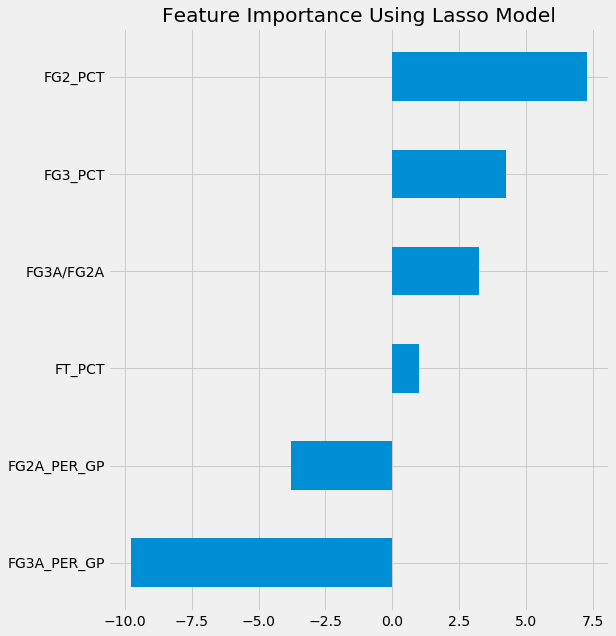

In [78]:
coef=pd.Series(lasso_model.coef_,index=X.columns)

imp_coef=coef.sort_values()

plt.plot(figsize=(10,8))
imp_coef.plot(kind = "barh")
plt.title("Feature Importance Using Lasso Model");

In [212]:
feats=['FG2_PCT','FG3_PCT','FT_PCT','FG2M_PER_GP','FG2A_PER_GP','FG3M_PER_GP','FG3A_PER_GP','FTM_PER_GP','FTA_PER_GP','OREB_PER_GP','DREB_PER_GP','AST_PER_GP','PF_PER_GP','STL_PER_GP','TOV_PER_GP','BLK_PER_GP']
X=teams_master[feats]
y=teams_master['Wins']

In [213]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=69)

In [214]:
ss=StandardScaler()
Z_train=ss.fit_transform(X_train)
Z_test=ss.transform(X_test)

In [84]:
r_alphas=np.logspace(0,5,100)
ridge_model=RidgeCV(alphas=r_alphas,scoring='r2',cv=5)
ridge_model=ridge_model.fit(Z_train,y_train)
print(f"Train R2 Score: {ridge_model.score(Z_train,y_train)}")
print(f" Test R2 Score: {ridge_model.score(Z_test,y_test)}")

Train R2 Score: 0.7905393433676597
 Test R2 Score: 0.8189570223499358


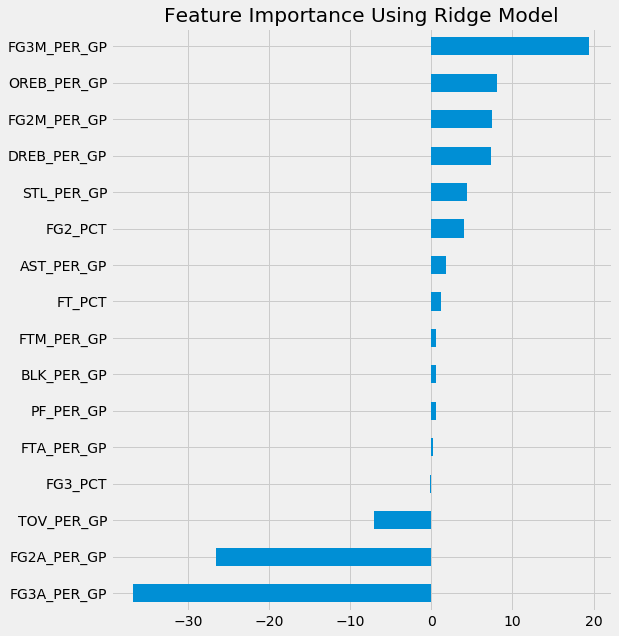

In [85]:
coef=pd.Series(ridge_model.coef_,index=X.columns)

imp_coef=coef.sort_values()

plt.plot(figsize=(10,8))
imp_coef.plot(kind = "barh")
plt.title("Feature Importance Using Ridge Model");

In [86]:
l_alphas=np.logspace(0,5,100)
lasso_model=LassoCV(alphas=l_alphas,cv=5,max_iter=5000)
lasso_model=ridge_model.fit(Z_train,y_train)
print(f"Train R2 Score: {lasso_model.score(Z_train,y_train)}")
print(f" Test R2 Score: {lasso_model.score(Z_test,y_test)}")

Train R2 Score: 0.7905393433676597
 Test R2 Score: 0.8189570223499358


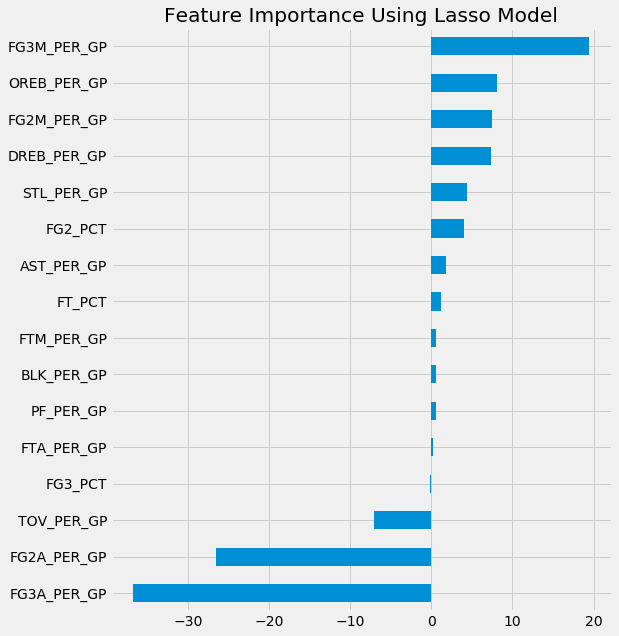

In [92]:
coef=pd.Series(lasso_model.coef_,index=X.columns)

imp_coef=coef.sort_values()

plt.plot(figsize=(10,8))
imp_coef.plot(kind = "barh")
plt.title("Feature Importance Using Lasso Model");

In [215]:
z_train=sm.add_constant(Z_train)

In [216]:
ols=sm.OLS(y_train,z_train)

In [217]:
model=ols.fit()

In [218]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wins   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     191.3
Date:                Mon, 16 Mar 2020   Prob (F-statistic):          2.23e-250
Time:                        13:57:20   Log-Likelihood:                -2384.5
No. Observations:                 759   AIC:                             4803.
Df Residuals:                     742   BIC:                             4882.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.5828      0.206    202.278      0.000      41.179      41.986
x1            -5.0787      1.658     -3.064      0.002      -8.333      -1.824
x2            -1.6468      0.398     -4.140      0.000      -2.428      -0.866
x3             0.4904      1.850      0.265      0.791      -3.141       4.122
x4            35.6497      5.134      6.944      0.000      25.571      45.729
x5           -54.7050      4.961    -11.026      0.000     -64.445     -44.965
x6            34.5075      2.808     12.290      0.000      28.995      40.020
x7           -50.9871      2.706    -18.839      0.000     -56.300     -45.674
x8             2.4697      5.873      0.421      0.674      -9.060      13.999
x9            -1.7357      5.740     -0.302      0.762     -13.005       9.533
x10            8.8434      0.439     20.143      0.000       7.982       9.705
x11            7.7862      0.358     21.723      0.000       7.082       8.490
x12            1.4991      0.367      4.081      0.000       0.778       2.220
x13            0.6333      0.313      2.025      0.043       0.019       1.247
x14            4.8534      0.273     17.781      0.000       4.318       5.389
x15           -7.2501      0.318    -22.790      0.000      -7.875      -6.626
x16            0.5443      0.231      2.359      0.019       0.091       0.997
==============================================================================
Omnibus:                        1.981   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                2.017
Skew:                           0.123   Prob(JB):                        0.365
Kurtosis:                       2.945   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [219]:
y_preds=model.predict(z_train)
r2_score(y_train,y_preds)

0.8048939310194891

In [102]:
z_test=sm.add_constant(Z_test)

In [104]:
y_preds=model.predict(z_test)

In [105]:
r2_score(y_test,y_preds)

0.8292833215228629

In [210]:
pvalues=model.pvalues.to_frame().rename(columns={0:'P Value'})
pvalues['Coef']=model.params.to_list()
pvalues.drop('const',inplace=True)
pvalues['Vars']=feats
pvalues.set_index('Vars',inplace=True)
pvalues.sort_values(by=['P Value'])

,P Value,Coef
Vars,,
TOV_PER_GP,1.465805e-87,-7.250075
DREB_PER_GP,2.304090e-81,7.786153
OREB_PER_GP,2.569598e-72,8.843412
FG3A_PER_GP,5.333058e-65,-50.987063
STL_PER_GP,3.474749e-59,4.853440
FG3M_PER_GP,9.919873e-32,34.507502
FG2A_PER_GP,2.753155e-26,-54.705050
FG2M_PER_GP,8.348782e-12,35.649740
FG3_PCT,3.878271e-05,-1.646833


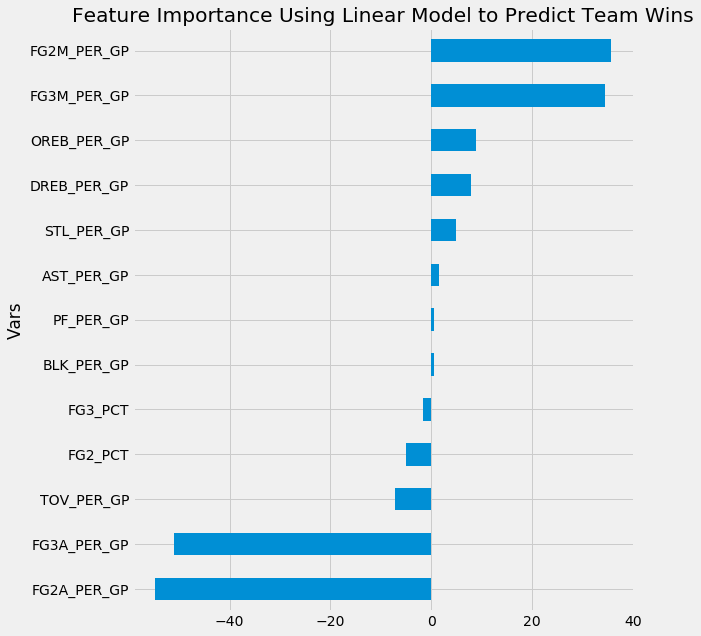

In [211]:
imp_coef=pvalues.loc[pvalues['P Value']<.05]['Coef'].sort_values()

plt.plot(figsize=(10,8))
imp_coef.plot(kind = "barh")
plt.title("Feature Importance Using Linear Model to Predict Team Wins");

In [180]:
feats=['FG2_PCT','FG3_PCT','FT_PCT','FG2M_PER_GP','FG2A_PER_GP','FG3M_PER_GP','FG3A_PER_GP','FTM_PER_GP','FTA_PER_GP','OREB_PER_GP','DREB_PER_GP','AST_PER_GP','PF_PER_GP','STL_PER_GP','TOV_PER_GP','BLK_PER_GP']
X=teams_master[feats]
y=teams_master['PLAYOFFS']

In [181]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=69)

In [182]:
ss=StandardScaler()
Z_train=ss.fit_transform(X_train)
Z_test=ss.transform(X_test)

In [183]:
logreg = LogisticRegression()

In [184]:
logreg.fit(Z_train,y_train)
logreg.score(Z_train,y_train)

0.841897233201581

In [185]:
logreg.score(Z_test,y_test)

0.8228346456692913

In [187]:
pred=logreg.predict(Z_train)
cm=confusion_matrix(y_train,pred)
cm_df = pd.DataFrame(cm,
                    columns = ['pred losers', 'pred playoffs'],
                    index = ['actual losers', 'actual playoffs'])
cm_df

,pred losers,pred playoffs
actual losers,245,62
actual playoffs,58,394


In [186]:
pred=logreg.predict(Z_test)
cm=confusion_matrix(y_test,pred)
cm_df = pd.DataFrame(cm,
                    columns = ['pred losers', 'pred playoffs'],
                    index = ['actual losers', 'actual playoffs'])
cm_df

,pred losers,pred playoffs
actual losers,98,27
actual playoffs,18,111


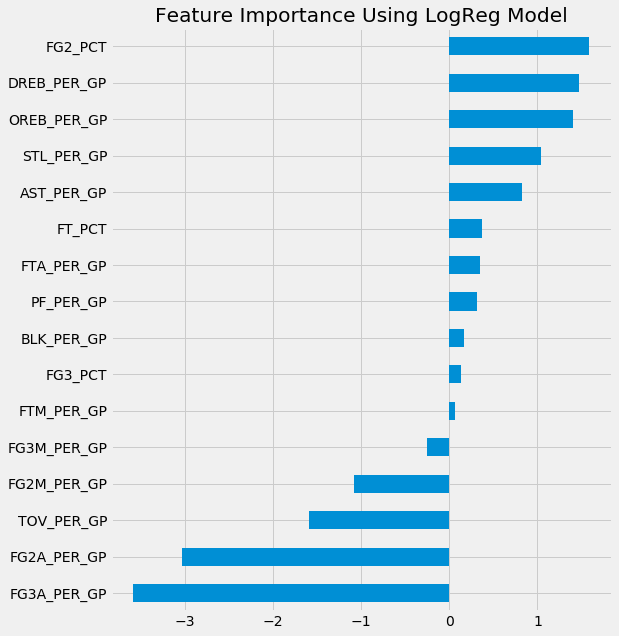

In [143]:
coef=pd.Series(logreg.coef_[0],index=X.columns)

imp_coef=coef.sort_values()

plt.plot(figsize=(10,8))
imp_coef.plot(kind = "barh")
plt.title("Feature Importance Using LogReg Model");

In [191]:
logit = sm.Logit(y_train,Z_train)
logmodel=logit.fit()

Optimization terminated successfully.
         Current function value: 0.357265
         Iterations 7


In [207]:
y_preds=logmodel.predict(Z_train)
ypreds=[0 if i<0.5 else 1 for i in y_preds]
accuracy_score(y_train,ypreds)

0.8458498023715415

In [208]:
y_preds=logmodel.predict(Z_test)
ypreds=[0 if i<0.5 else 1 for i in y_preds]
accuracy_score(y_test,ypreds)

0.8307086614173228

In [194]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               PLAYOFFS   No. Observations:                  759
Model:                          Logit   Df Residuals:                      743
Method:                           MLE   Df Model:                           15
Date:                Mon, 16 Mar 2020   Pseudo R-squ.:                  0.4706
Time:                        12:03:23   Log-Likelihood:                -271.16
converged:                       True   LL-Null:                       -512.16
Covariance Type:            nonrobust   LLR p-value:                 3.618e-93
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.8888      0.957     -3.020      0.003      -4.764      -1.014
x2            -0.6102      0.212     -2.877      0.004      -1.026      -0.195
x3             1.0289      1.033      0.996      0.319      -0.996       3.054
x4            13.3984      3.105      4.315      0.000       7.313      19.484
x5           -18.4814      3.121     -5.922      0.000     -24.598     -12.365
x6             6.6829      1.560      4.285      0.000       3.626       9.740
x7           -11.0453      1.592     -6.939      0.000     -14.165      -7.925
x8            -1.9978      3.319     -0.602      0.547      -8.503       4.507
x9             2.2810      3.242      0.704      0.482      -4.074       8.636
x10            2.1201      0.263      8.048      0.000       1.604       2.636
x11            2.0410      0.229      8.898      0.000       1.591       2.491
x12            0.8162      0.207      3.934      0.000       0.410       1.223
x13            0.4477      0.172      2.599      0.009       0.110       0.785
x14            1.4148      0.165      8.551      0.000       1.091       1.739
x15           -2.0133      0.212     -9.498      0.000      -2.429      -1.598
x16            0.0885      0.124      0.717      0.473      -0.154       0.331
==============================================================================
"""

In [192]:
pvalues=logmodel.pvalues.to_frame().rename(columns={0:'P Value'})
pvalues['Coef']=logmodel.params.to_list()
pvalues['Vars']=feats
pvalues.set_index('Vars',inplace=True)
pvalues.sort_values(by=['P Value'])

,P Value,Coef
Vars,,
TOV_PER_GP,2.149787e-21,-2.013283
DREB_PER_GP,5.670190e-19,2.041044
STL_PER_GP,1.216529e-17,1.414821
OREB_PER_GP,8.428626e-16,2.120075
FG3A_PER_GP,3.951593e-12,-11.045326
FG2A_PER_GP,3.177764e-09,-18.481444
FG2M_PER_GP,1.592660e-05,13.398364
FG3M_PER_GP,1.830050e-05,6.682920
AST_PER_GP,8.366096e-05,0.816213


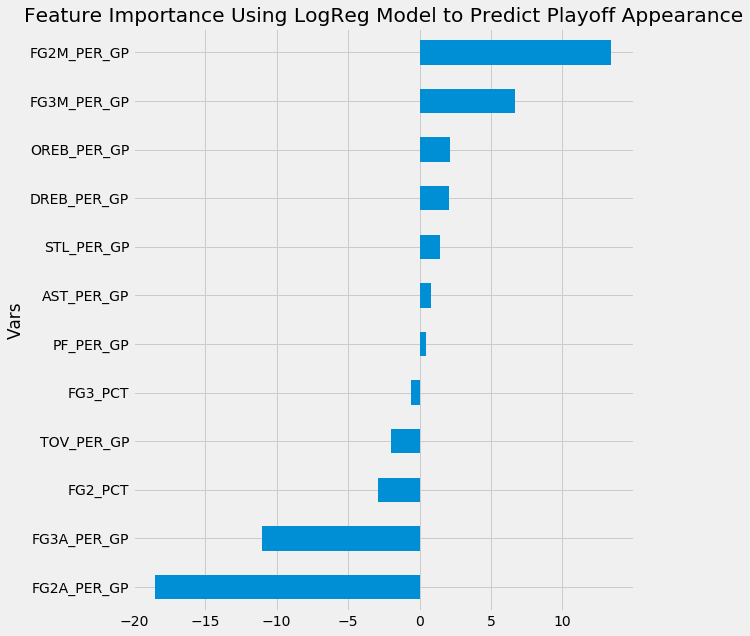

In [209]:
imp_coef=pvalues.loc[pvalues['P Value']<.05]['Coef'].sort_values()

plt.plot(figsize=(10,8))
imp_coef.plot(kind = "barh")
plt.title("Feature Importance Using LogReg Model to Predict Playoff Appearance");

In [150]:
feats=['FG2_PCT','FG3_PCT','FT_PCT','FG2M_PER_GP','FG2A_PER_GP','FG3M_PER_GP','FG3A_PER_GP','FTM_PER_GP','FTA_PER_GP','OREB_PER_GP','DREB_PER_GP','AST_PER_GP','PF_PER_GP','STL_PER_GP','TOV_PER_GP','BLK_PER_GP']
X=teams_master[feats]
y=teams_master['CHAMPS']

In [151]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=69,stratify=y)

In [152]:
ss=StandardScaler()
Z_train=ss.fit_transform(X_train)
Z_test=ss.transform(X_test)

In [153]:
logreg = LogisticRegression()

In [154]:
logreg.fit(Z_train,y_train)
logreg.score(Z_train,y_train)

0.9657444005270093

In [155]:
logreg.score(Z_test,y_test)

0.9645669291338582

In [157]:
pred=logreg.predict(Z_test)

In [158]:
cm=confusion_matrix(y_test,pred)
cm

array([[244,   1],
       [  8,   1]])

In [161]:
cm_df = pd.DataFrame(cm,
                    columns = ['pred losers', 'pred champs'],
                    index = ['actual losers', 'actual champs'])

In [162]:
cm_df

,pred losers,pred champs
actual losers,244,1
actual champs,8,1


In [165]:
1/9 # sensitivity

0.1111111111111111

In [166]:
pred=logreg.predict(Z_train)

In [167]:
cm=confusion_matrix(y_train,pred)
cm

array([[731,   1],
       [ 25,   2]])

In [168]:
cm_df = pd.DataFrame(cm,
                    columns = ['pred losers', 'pred champs'],
                    index = ['actual losers', 'actual champs'])

In [169]:
cm_df

,pred losers,pred champs
actual losers,731,1
actual champs,25,2


In [170]:
2/27 # sensitivity

0.07407407407407407

In [171]:
feats=['FG2_PCT','FG3_PCT','FT_PCT','FG2M_PER_GP','FG2A_PER_GP','FG3M_PER_GP','FG3A_PER_GP','FTM_PER_GP','FTA_PER_GP','OREB_PER_GP','DREB_PER_GP','AST_PER_GP','PF_PER_GP','STL_PER_GP','TOV_PER_GP','BLK_PER_GP']
X=teams_master[feats]
y=teams_master['FINALS_APPEARANCE']

In [173]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=69,stratify=y)

In [174]:
ss=StandardScaler()
Z_train=ss.fit_transform(X_train)
Z_test=ss.transform(X_test)

In [175]:
logreg = LogisticRegression()

In [176]:
logreg.fit(Z_train,y_train)
logreg.score(Z_train,y_train)

0.9314888010540184

In [177]:
logreg.score(Z_test,y_test)

0.937007874015748

In [178]:
pred=logreg.predict(Z_test)
cm=confusion_matrix(y_test,pred)
cm_df = pd.DataFrame(cm,
                    columns = ['pred losers', 'pred finals appearance'],
                    index = ['actual losers', 'actual finals appearance'])

In [179]:
cm_df

,pred losers,pred finals appearance
actual losers,236,0
actual finals appearance,16,2
